In [25]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import io
import PIL

In [26]:
# Reading in the csv data
data = pd.read_csv(
    '/Users/admin/Documents/Summer Research/sid-project/data/raw/Casos_Diarios_Municipio_Confirmados_20200809.csv'
)

In [27]:
data['cve_ent']=data['cve_ent'].astype('object')
data=data.groupby('cve_ent').sum()


In [28]:
data=data.drop(columns=['poblacion'])
data.head()


,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,...,30-07-2020,31-07-2020,1/8/20,2/8/20,3/8/20,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20
cve_ent,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,47,40,27,13,48,52,42,13,0,1
1002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,3,2,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,2,1,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,3,2,2,2,1,5,0,0,0,0


In [29]:
# Read Mexico map sh

municipios = gpd.read_file(r'/Users/admin/Documents/Summer Research/sid-project/Maps/mexico_municipios/muni_2018cw.shp')

In [30]:
municipios['CVEGEO']=municipios['CVEGEO'].astype('int64')
municipios['CVEGEO']=municipios['CVEGEO'].astype('object')


In [31]:
municipios.head()

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
0,01,001,1001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((2489959.178 1111683.059, 2489874.765..."
1,01,002,1002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((2500060.239 1133299.990, 2500061.087..."
2,01,003,1003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((2440783.884 1105688.003, 2440782.149..."
3,01,004,1004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((2474059.871 1150395.908, 2474143.258..."
4,01,005,1005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((2468125.584 1113246.796, 2468516.662..."


In [32]:

municipios = municipios.drop(columns=['CVE_ENT','CVE_MUN', 'NOM_ENT', 'AREA','NOM_MUN','COV_','COV_ID','PERIMETER'])



In [33]:
merge = municipios.join(data,on='CVEGEO',how='right')
merge.head()

,CVEGEO,geometry,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,...,30-07-2020,31-07-2020,1/8/20,2/8/20,3/8/20,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20
0,1001,"POLYGON ((2489959.178 1111683.059, 2489874.765...",0,0,0,0,0,0,0,0,...,47,40,27,13,48,52,42,13,0,1
1,1002,"POLYGON ((2500060.239 1133299.990, 2500061.087...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
2,1003,"POLYGON ((2440783.884 1105688.003, 2440782.149...",0,0,0,0,0,0,0,0,...,1,1,0,0,3,2,0,0,0,0
3,1004,"POLYGON ((2474059.871 1150395.908, 2474143.258...",0,0,0,0,0,0,0,0,...,0,3,0,0,1,2,1,0,0,0
4,1005,"POLYGON ((2468125.584 1113246.796, 2468516.662...",0,0,0,0,0,0,0,0,...,3,2,2,2,1,5,0,0,0,0


In [34]:
merge= merge.replace(np.nan,0)

In [35]:
merge.head()

,CVEGEO,geometry,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,...,30-07-2020,31-07-2020,1/8/20,2/8/20,3/8/20,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20
0,1001,"POLYGON ((2489959.178 1111683.059, 2489874.765...",0,0,0,0,0,0,0,0,...,47,40,27,13,48,52,42,13,0,1
1,1002,"POLYGON ((2500060.239 1133299.990, 2500061.087...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
2,1003,"POLYGON ((2440783.884 1105688.003, 2440782.149...",0,0,0,0,0,0,0,0,...,1,1,0,0,3,2,0,0,0,0
3,1004,"POLYGON ((2474059.871 1150395.908, 2474143.258...",0,0,0,0,0,0,0,0,...,0,3,0,0,1,2,1,0,0,0
4,1005,"POLYGON ((2468125.584 1113246.796, 2468516.662...",0,0,0,0,0,0,0,0,...,3,2,2,2,1,5,0,0,0,0


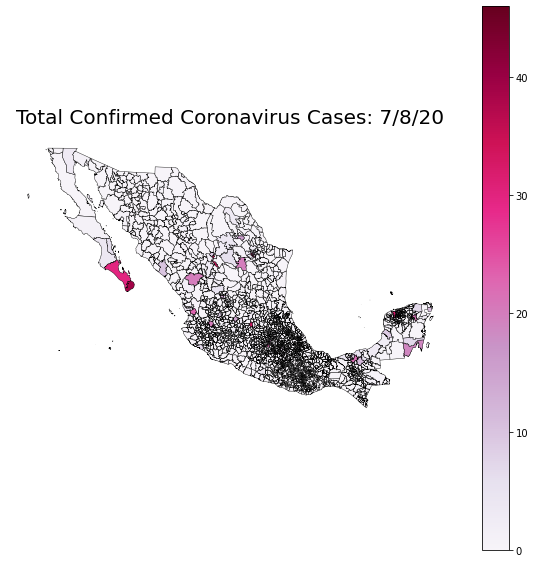

In [36]:
image_frames = []


for dates in merge.columns.to_list()[210:211]:

    # Plot

    ax = merge.plot(column=dates,
                    cmap='PuRd',
                    figsize=(10, 10),
                    legend=True,
                    edgecolor='black',
                    linewidth=0.4)

    # Add a title to the map
    ax.set_title('Total Confirmed Coronavirus Cases: ' +
                 dates, fontdict={'fontsize': 20}, pad=12.5)
    
    
    


    # Removing the axes

    ax.set_axis_off()


    img = ax.get_figure()
    
   


    


    f = io.BytesIO()

    img.savefig(f, format='png', bbox_inches='tight')

    f.seek(0)

    image_frames.append(PIL.Image.open(f))
    
        
